In [1]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras import backend as K
import re
import os
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

Using TensorFlow backend.


In [2]:
classes = os.listdir('./data/input_images')
classes

['paper', 'cardboard', 'plastic', 'metal', 'trash', 'glass']

In [3]:
def get_picture_per_classes(classes):
    return [os.listdir('./data/input_images/'+ item) for item in classes]

In [4]:
images = get_picture_per_classes(classes)

In [5]:
def get_image_name(item):
    return item.split('.')[0]

In [6]:
images_name = [get_image_name(item) for image in images for item in image]

In [7]:
def get_classes_from_images(item):
    num = re.findall('\d+', item)
    return item.split(num[0])[0]

In [8]:
image_classes = [get_classes_from_images(item) for item in images_name]

In [9]:
new_dict = {'Images_name':images_name, 'Image_class': image_classes}

In [10]:
p = pd.DataFrame(new_dict, index=images_name, columns=['Image_class'])
p.head()

,Image_class
paper85,paper
paper503,paper
paper75,paper
paper482,paper
paper300,paper


In [11]:
new_p = pd.get_dummies(p['Image_class'])
new_p.head()
new_p.to_csv(r'./images_dummies.csv')

In [12]:
# paths:
DATASET = 'images_dummies.csv'
ROOT_IMG = './data/input_images/'
ROOT_IMG_DAUGHTERS = classes
ROOT_MODELS = 'Models/'
# img size:
ROW_IMAGES = 384
COL_IMAGES = 512
IMG_COLORS = 3
input_shape = (ROW_IMAGES, COL_IMAGES, IMG_COLORS)
# num of pictures:
PIC_NUM = 2527
# train-test parameters:
TRAIN_RATIO = 0.2
RANDOM_STATE = 42
# fit parameters:
BATCH_SIZE = 20
EPOCHS =10

COLUMNS = ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']
num_classes = len(COLUMNS)

In [13]:
new_p['image'] = new_p.index
new_p.head()

,cardboard,glass,metal,paper,plastic,trash,image
paper85,0,0,0,1,0,0,paper85
paper503,0,0,0,1,0,0,paper503
paper75,0,0,0,1,0,0,paper75
paper482,0,0,0,1,0,0,paper482
paper300,0,0,0,1,0,0,paper300


In [14]:
def get_image(item):
    return item + '.jpg'

In [15]:
def get_parental_path(item):
    parental = get_classes_from_images(item)
    return parental + '/'+ get_image(item)

In [16]:
def get_array(a, b, c, d, e, f): 
    return [a, b, c, d, e, f]

In [17]:
images=[]
wastes=[]
for row, index_row in new_p.iterrows():
    #tomo la ruta de la imagen
    image_root = get_parental_path(row)
    #leo la imagen
    read_image = cv2.imread(ROOT_IMG + image_root)
    #gardo la imagen en images
    gray_image = cv2.cvtColor(read_image, cv2.COLOR_BGR2GRAY)
    resized_img = cv2.resize(gray_image, None, fx=0.5, fy=0.5)
    expanded_dim = np.expand_dims(resized_img, axis=2)
    #float_image = gray_image.astype('float32')
    #float_image /= 255
    images.append(expanded_dim)
    
    #creo un array de 0s y 1s para saber el tipo de residuo presente en la imagen
    wastes.append(get_array(new_p['cardboard'][row], new_p['glass'][row], new_p['metal'][row], 
            new_p['paper'][row], new_p['plastic'][row], new_p['trash'][row]))
    # lo guardo en wastes
    #wastes.append()
images
wastes

[[0, 0, 0, 1, 0, 0],
 [0, 0, 0, 1, 0, 0],
 [0, 0, 0, 1, 0, 0],
 [0, 0, 0, 1, 0, 0],
 [0, 0, 0, 1, 0, 0],
 [0, 0, 0, 1, 0, 0],
 [0, 0, 0, 1, 0, 0],
 [0, 0, 0, 1, 0, 0],
 [0, 0, 0, 1, 0, 0],
 [0, 0, 0, 1, 0, 0],
 [0, 0, 0, 1, 0, 0],
 [0, 0, 0, 1, 0, 0],
 [0, 0, 0, 1, 0, 0],
 [0, 0, 0, 1, 0, 0],
 [0, 0, 0, 1, 0, 0],
 [0, 0, 0, 1, 0, 0],
 [0, 0, 0, 1, 0, 0],
 [0, 0, 0, 1, 0, 0],
 [0, 0, 0, 1, 0, 0],
 [0, 0, 0, 1, 0, 0],
 [0, 0, 0, 1, 0, 0],
 [0, 0, 0, 1, 0, 0],
 [0, 0, 0, 1, 0, 0],
 [0, 0, 0, 1, 0, 0],
 [0, 0, 0, 1, 0, 0],
 [0, 0, 0, 1, 0, 0],
 [0, 0, 0, 1, 0, 0],
 [0, 0, 0, 1, 0, 0],
 [0, 0, 0, 1, 0, 0],
 [0, 0, 0, 1, 0, 0],
 [0, 0, 0, 1, 0, 0],
 [0, 0, 0, 1, 0, 0],
 [0, 0, 0, 1, 0, 0],
 [0, 0, 0, 1, 0, 0],
 [0, 0, 0, 1, 0, 0],
 [0, 0, 0, 1, 0, 0],
 [0, 0, 0, 1, 0, 0],
 [0, 0, 0, 1, 0, 0],
 [0, 0, 0, 1, 0, 0],
 [0, 0, 0, 1, 0, 0],
 [0, 0, 0, 1, 0, 0],
 [0, 0, 0, 1, 0, 0],
 [0, 0, 0, 1, 0, 0],
 [0, 0, 0, 1, 0, 0],
 [0, 0, 0, 1, 0, 0],
 [0, 0, 0, 1, 0, 0],
 [0, 0, 0, 1, 0, 0],
 [0, 0, 0, 1,

In [18]:
x = np.array(images)
y = np.array(wastes)

In [19]:
x[0].shape

(192, 256, 1)

def get_matrix():
    result = []
    columns = ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']
    for col in columns:
        result.append(new_p[col])
    return result

def image_to_array(image,inx,iny):
    # Converts image to an inx * iny size, change color to greyscale and flatten it into 1D ndarray
    image = cv2.resize(image,(inx,iny)) 
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 
    image = np.reshape(image,(inx,iny))
    return np.ndarray.flatten(image)

def transform_data(item):
    

COLUMNS = new_p.columns
data = pd.DataFrame(new_p,columns=['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash', 'image'])
data.reset_index(drop=True)
data.to_csv('data.csv')
data.head()

type(df.image[0])
imagen = cv2.imread(ROOT_IMG+'paper/paper1.jpg')
for lista in imagen:
    for pixel in lista:
        print(pixel/255)

def replace_value(item):
    return item.replace('\n', ',')

imagen= cv2.imread('./data/input_images/paper/paper7.jpg')
plt.imshow(Image.fromarray(imagen.squeeze()))


In [20]:
import sklearn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=TRAIN_RATIO, random_state=RANDOM_STATE)

In [21]:
x.shape
y.shape

(2527, 6)

In [22]:
# Prepare data to feed the NN
num_classes = 6

"""
if K.image_data_format() == 'channels_first':
    input_shape = [1, ROW_IMAGES, COL_IMAGES]
    X_train = X_train.reshape(X_train.shape[0], 1, ROW_IMAGES, COL_IMAGES)
    X_test = X_test.reshape(X_test.shape[0], 1, ROW_IMAGES, COL_IMAGES)
    
else:
    print('hola')
    print(X_train.shape)
    input_shape = [ROW_IMAGES, COL_IMAGES, 1]
    X_train.reshape(X_train.shape[0], input_shape[0], input_shape[1], input_shape[2])
    X_test.reshape(X_test.shape[0], input_shape[0], input_shape[1], input_shape[2])"""# Ask keras which format to use depending on used backend and arrange data as expected

    
# Incoming data is in uint8. Cast the input data images to be floats in range [0.0-1.0]
#normalize = lambda pixel: pixel/255 
#x_train = normalize(X_train)

X_train = X_train.astype('float32')
#X_test = normalize(X_test)
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print('x_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')
# convert class vectors to binary class matrices
"""y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)"""
X_train

x_train shape: (2021, 192, 256, 1)
2021 train samples
506 test samples


array([[[[1.        ],
         [0.99607843],
         [0.99215686],
         ...,
         [0.8235294 ],
         [0.81960785],
         [0.8156863 ]],

        [[1.        ],
         [1.        ],
         [0.99607843],
         ...,
         [0.8235294 ],
         [0.81960785],
         [0.8156863 ]],

        [[1.        ],
         [1.        ],
         [0.99607843],
         ...,
         [0.8235294 ],
         [0.81960785],
         [0.8156863 ]],

        ...,

        [[0.5568628 ],
         [0.49411765],
         [0.49019608],
         ...,
         [0.18039216],
         [0.16470589],
         [0.16862746]],

        [[0.44705883],
         [0.49019608],
         [0.44705883],
         ...,
         [0.16862746],
         [0.16078432],
         [0.16078432]],

        [[0.46666667],
         [0.5529412 ],
         [0.38431373],
         ...,
         [0.16078432],
         [0.17254902],
         [0.17254902]]],


       [[[0.67058825],
         [0.67058825],
         [0.66

In [26]:
y_train

array([[0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0, 0]], dtype=uint8)

X_train = X_train.astype('float32')
#X_test = normalize(X_test)
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

In [23]:
## This is the neural network proposed architecture
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu', input_shape=(x.shape[1:])))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,
             optimizer=keras.optimizers.Adadelta(),
             metrics=['accuracy'])


In [24]:
batch_size = 20
epochs = 10
model.fit(X_train, y_train,
         batch_size=batch_size,
         epochs=epochs,
         verbose=1,
         validation_data=(X_test,  y_test))

Train on 2021 samples, validate on 506 samples
Epoch 1/10
2021/2021 [==============================] - 277s 137ms/step - loss: 2.4574 - accuracy: 0.2563 - val_loss: 5.0593 - val_accuracy: 0.2312
Epoch 2/10
2021/2021 [==============================] - 272s 135ms/step - loss: 1.6336 - accuracy: 0.3518 - val_loss: 1.5324 - val_accuracy: 0.3478
Epoch 3/10
2021/2021 [==============================] - 261s 129ms/step - loss: 1.4433 - accuracy: 0.4344 - val_loss: 1.4629 - val_accuracy: 0.4308
Epoch 4/10
2021/2021 [==============================] - 250s 124ms/step - loss: 1.2401 - accuracy: 0.5477 - val_loss: 1.3835 - val_accuracy: 0.4308
Epoch 5/10
2021/2021 [==============================] - 253s 125ms/step - loss: 1.0086 - accuracy: 0.6279 - val_loss: 1.3896 - val_accuracy: 0.4447
Epoch 6/10
2021/2021 [==============================] - 254s 126ms/step - loss: 0.7492 - accuracy: 0.7442 - val_loss: 2.1391 - val_accuracy: 0.3419
Epoch 7/10
2021/2021 [==============================] - 258s 128m

In [25]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 190, 254, 32)      320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 188, 252, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 94, 126, 64)       0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 94, 126, 64)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 758016)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               97026176  
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)              

In [26]:
score = model.evaluate(X_train, y_train, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Test loss: 0.044630113070176794
Test accuracy: 0.9920831322669983


In [27]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])



Test loss: 2.078459368392884
Test accuracy: 0.4683794379234314


In [31]:
model.save('first_model.h5')

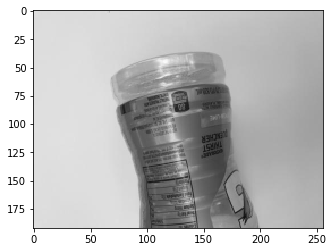

In [30]:
%matplotlib inline
import matplotlib.pyplot as plt
from PIL import Image
img = X_test[30]
plt.imshow(Image.fromarray(img.squeeze()*255))


In [54]:

pred = model.predict(np.expand_dims(img, axis=0))
print("Probs -> Cardboard:{0:.5f} Glass:{1:.5f} Metal:{2:.5f} Paper:{3:.5f} Plastic:{4:.5f} Trash:{5:.5f}".format(pred[0,0], pred[0,1], pred[0,2],pred[0,3],pred[0,4],pred[0,5]))


Probs -> Cardboard:0.00018 Glass:0.15263 Metal:0.04837 Paper:0.00012 Plastic:0.79863 Trash:0.00006


In [46]:
pred

array([[1.7850030e-04, 1.5263180e-01, 4.8371535e-02, 1.2391777e-04,
        7.9863405e-01, 6.0136714e-05]], dtype=float32)

In [32]:
## This is the neural network proposed architecture
model2 = Sequential()
model2.add(Conv2D(32, kernel_size=(3, 3),activation='relu', input_shape=(x.shape[1:])))
model2.add(Conv2D(64, (3, 3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))
model2.add(Flatten())
model2.add(Dense(128, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(num_classes, activation='sigmoid'))
model2.compile(loss=keras.losses.categorical_crossentropy,
             optimizer=keras.optimizers.Adam(),
             metrics=['binary_accuracy'])

In [33]:
batch_size = 20
epochs = 10
model2.fit(X_train, y_train,
         batch_size=batch_size,
         epochs=epochs,
         verbose=1,
         validation_data=(X_test,  y_test))

Train on 2021 samples, validate on 506 samples
Epoch 1/10
2021/2021 [==============================] - 236s 117ms/step - loss: 2.0181 - binary_accuracy: 0.5299 - val_loss: 1.7693 - val_binary_accuracy: 0.6173
Epoch 2/10
2021/2021 [==============================] - 230s 114ms/step - loss: 1.6105 - binary_accuracy: 0.6677 - val_loss: 1.6337 - val_binary_accuracy: 0.7213
Epoch 3/10
2021/2021 [==============================] - 230s 114ms/step - loss: 1.3923 - binary_accuracy: 0.7652 - val_loss: 1.4448 - val_binary_accuracy: 0.7915
Epoch 4/10
2021/2021 [==============================] - 229s 113ms/step - loss: 1.1112 - binary_accuracy: 0.8394 - val_loss: 2.0416 - val_binary_accuracy: 0.8123
Epoch 5/10
2021/2021 [==============================] - 229s 114ms/step - loss: nan - binary_accuracy: 0.1115 - val_loss: nan - val_binary_accuracy: 0.0000e+00
Epoch 6/10
2021/2021 [==============================] - 228s 113ms/step - loss: nan - binary_accuracy: 0.0000e+00 - val_loss: nan - val_binary_ac

In [34]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 190, 254, 32)      320       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 188, 252, 64)      18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 94, 126, 64)       0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 94, 126, 64)       0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 758016)            0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               97026176  
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)              

In [35]:
score = model2.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Test loss: nan
Test accuracy: 0.0


In [36]:
model2.save('worst_model.h5')

In [40]:
## This is the neural network proposed architecture
model3 =Sequential()
model3.add(Conv2D(32, kernel_size=(3, 3),activation='relu',kernel_initializer='he_normal',input_shape=(x.shape[1:])))
model3.add(Conv2D(32, kernel_size=(3, 3),activation='relu',kernel_initializer='he_normal'))
model3.add(MaxPooling2D((2, 2)))
model3.add(Dropout(0.20))
model3.add(Conv2D(64, (3, 3), activation='relu',padding='same',kernel_initializer='he_normal'))
model3.add(Conv2D(64, (3, 3), activation='relu',padding='same',kernel_initializer='he_normal'))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Dropout(0.25))
model3.add(Conv2D(128, (3, 3), activation='relu',padding='same',kernel_initializer='he_normal'))
model3.add(Dropout(0.25))
model3.add(Flatten())
model3.add(Dense(128, activation='relu'))
model3.add(BatchNormalization())
model3.add(Dropout(0.25))
model3.add(Dense(num_classes, activation='softmax'))
model3.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.RMSprop(), metrics=['accuracy'])

 880/2021 [============>.................] - ETA: 2:06 - loss: nan - binary_accuracy: 0.0000e+00

In [43]:
model4 = Sequential()
model4.add(Conv2D(32, kernel_size=(3, 3),activation='relu', input_shape=(X_train.shape[1:])))
model4.add(Conv2D(64, (3, 3), activation='relu'))
model4.add(MaxPooling2D(pool_size=(2, 2)))
model4.add(Dropout(0.25))
model4.add(Flatten())
model4.add(Dense(128, activation='relu'))
model4.add(Dropout(0.5))
model4.add(Dense(num_classes, activation='softmax'))
model4.compile(loss=keras.losses.categorical_crossentropy,
             optimizer=keras.optimizers.Adadelta(),
             metrics=['accuracy'])

In [44]:
batch_size = 20
epochs = 10
model4.fit(X_train, y_train,
         batch_size=batch_size,
         epochs=epochs,
         verbose=1,
         validation_data=(X_test,  y_test))

Train on 2021 samples, validate on 506 samples
Epoch 1/10
2021/2021 [==============================] - 260s 129ms/step - loss: 2.0487 - accuracy: 0.2380 - val_loss: 1.6498 - val_accuracy: 0.2411
Epoch 2/10
2021/2021 [==============================] - 254s 126ms/step - loss: 1.5877 - accuracy: 0.3528 - val_loss: 1.5759 - val_accuracy: 0.2885
Epoch 3/10
2021/2021 [==============================] - 253s 125ms/step - loss: 1.4300 - accuracy: 0.4468 - val_loss: 1.4737 - val_accuracy: 0.3893
Epoch 4/10
2021/2021 [==============================] - 253s 125ms/step - loss: 1.1836 - accuracy: 0.5567 - val_loss: 1.5152 - val_accuracy: 0.4032
Epoch 5/10
2021/2021 [==============================] - 255s 126ms/step - loss: 0.9332 - accuracy: 0.6769 - val_loss: 1.7793 - val_accuracy: 0.3794
Epoch 6/10
2021/2021 [==============================] - 256s 127ms/step - loss: 0.6573 - accuracy: 0.7872 - val_loss: 1.4768 - val_accuracy: 0.4881
Epoch 7/10
2021/2021 [==============================] - 257s 127m

In [45]:
model4.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 190, 254, 32)      320       
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 188, 252, 64)      18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 94, 126, 64)       0         
_________________________________________________________________
dropout_15 (Dropout)         (None, 94, 126, 64)       0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 758016)            0         
_________________________________________________________________
dense_10 (Dense)             (None, 128)               97026176  
_________________________________________________________________
dropout_16 (Dropout)         (None, 128)              

In [47]:
score = model4.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 8.454753651449332
Test accuracy: 0.2707509994506836
